# House Price Regression - Kaggle Competition

This project shows the process of how I used the data to predict house prices. I decided to participate in this competition for the sole purpose of learning data science and specifically data cleaning and wrangling. I am obviously just getting started and I am still learning. I will continue to improve my predictions, but this is what I've got so far. 

Start off by importing necessary libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Import the dataset

In [2]:
dataset = pd.read_csv("train.csv")
dataset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


We can see below that each column has 1460 rows, 79 variables that effect the sales price.

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

We first split the dataset into numerical components and categorical components
(I should have split the dataset into the training set and test set before doing anything. I did end up doing so in the end)

In [4]:
def get_num_non_num_col(data, num_col, non_num_col):
    for index in data.columns:
        if (data[index].dtype == float or data[index].dtype == int):
            list.append(num_col, index)
        else:
            list.append(non_num_col, index)

num_col = []
non_num_col = []
get_num_non_num_col(dataset, num_col, non_num_col)

In [5]:
#Removing the SalePrice (response variable) to only get the explanatory variables
num_col = num_col[1:-1]
num_col

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold']

We first analyze the numerical variables. Dealing with categorical data will come later.

We now look at how we can deal with missing values

In [7]:
dataset[num_col].isnull().sum()

MSSubClass         0
LotFrontage      259
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         8
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       81
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
dtype: int64

Looks like we have missing values for LotFrontage, MasVnrArea and GarageYrBlt

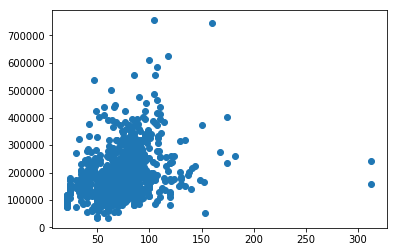

In [8]:
#LotFrontage dealing with Missing values
#LotFrontage has 259 missing values, which is a lot. However since all houses must have some sort of frontage 
# so we will impute the missing values instead of dropping the entire variable
# To get a better sense of the data we will look at its scatterplot
plt.scatter(x=dataset['LotFrontage'], y = dataset["SalePrice"])

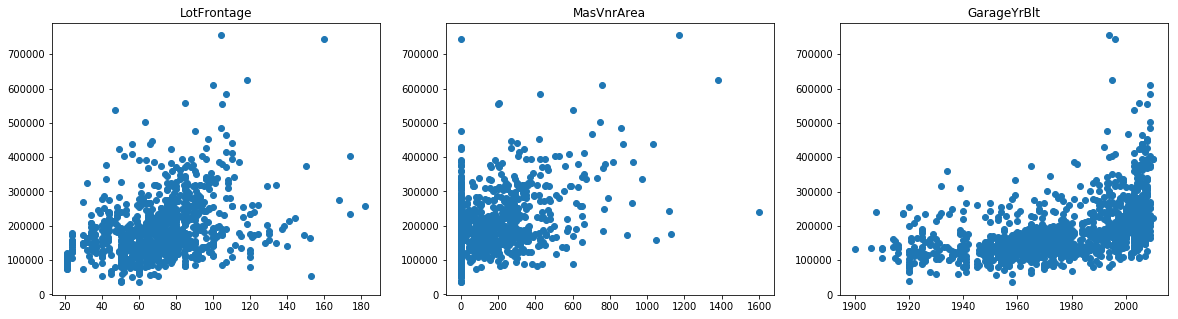

In [7]:
#Taking a look at the scatterplot, one can see that there is a positive correlation 
#between the LotFrontage and the Sales Price. 

#First get rid of outliers 
dataset.drop(dataset[dataset.LotFrontage>300].index, inplace = True)
dataset.reset_index(drop = True, inplace = True)

#Take a look at scatterplot
fix_missing = plt.figure(figsize=(20, 5))
plt.subplot(1, 3, 1)
plt.title('LotFrontage')
plt.scatter(x=dataset['LotFrontage'], y = dataset["SalePrice"])
plt.subplot(1, 3, 2)
plt.title('MasVnrArea')
plt.scatter(x=dataset['MasVnrArea'], y = dataset["SalePrice"])
plt.subplot(1, 3, 3)
plt.title('GarageYrBlt')
plt.scatter(x=dataset['GarageYrBlt'], y = dataset["SalePrice"])

You can notice that MasVnrArea has quite a lot of values that are zero. In fact zero is a median. Hence we will impute the missing values of the MasVnrArea with the median.

In [11]:
dataset['MasVnrArea'].median

<bound method Series.median of 0       196.0
1         0.0
2       162.0
3         0.0
4       350.0
5         0.0
6       186.0
7       240.0
8         0.0
9         0.0
10        0.0
11      286.0
12        0.0
13      306.0
14      212.0
15        0.0
16      180.0
17        0.0
18        0.0
19        0.0
20      380.0
21        0.0
22      281.0
23        0.0
24        0.0
25      640.0
26        0.0
27      200.0
28        0.0
29        0.0
        ...  
1428      0.0
1429      0.0
1430      0.0
1431    318.0
1432      0.0
1433    237.0
1434      0.0
1435    426.0
1436      0.0
1437     96.0
1438      0.0
1439    147.0
1440    160.0
1441      0.0
1442    106.0
1443      0.0
1444    189.0
1445    438.0
1446      0.0
1447      0.0
1448      0.0
1449    194.0
1450     80.0
1451      0.0
1452      0.0
1453      0.0
1454    119.0
1455      0.0
1456      0.0
1457      0.0
Name: MasVnrArea, Length: 1458, dtype: float64>

For the LotFrontage and GarageYrBlt, it seemed more likely to impute the mean (my gut feeling, definitely need to learn more about this)

But I went ahead and used sklearn to help me with the imputations.

In [8]:
from sklearn.impute import SimpleImputer
imputer_median = SimpleImputer(missing_values = np.nan, strategy = 'median')
dataset['LotFrontage'] = imputer_median.fit_transform(dataset['LotFrontage'].values.reshape(-1, 1))
dataset['MasVnrArea'] = imputer_median.fit_transform(dataset['MasVnrArea'].values.reshape(-1, 1))

imputer_mean = SimpleImputer(missing_values = np.nan, strategy = 'mean')
dataset['LotFrontage'] = imputer_mean.fit_transform(dataset['LotFrontage'].values.reshape(-1, 1))
dataset['GarageYrBlt'] = imputer_mean.fit_transform(dataset['GarageYrBlt'].values.reshape(-1, 1))

And now we can see there are no more missing values for numerical varaibles

In [12]:
dataset[num_col].isnull().sum()

MSSubClass       0
LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
dtype: int64

Now I would like to see a scatterplot of all the other variables vs. the SalePrice

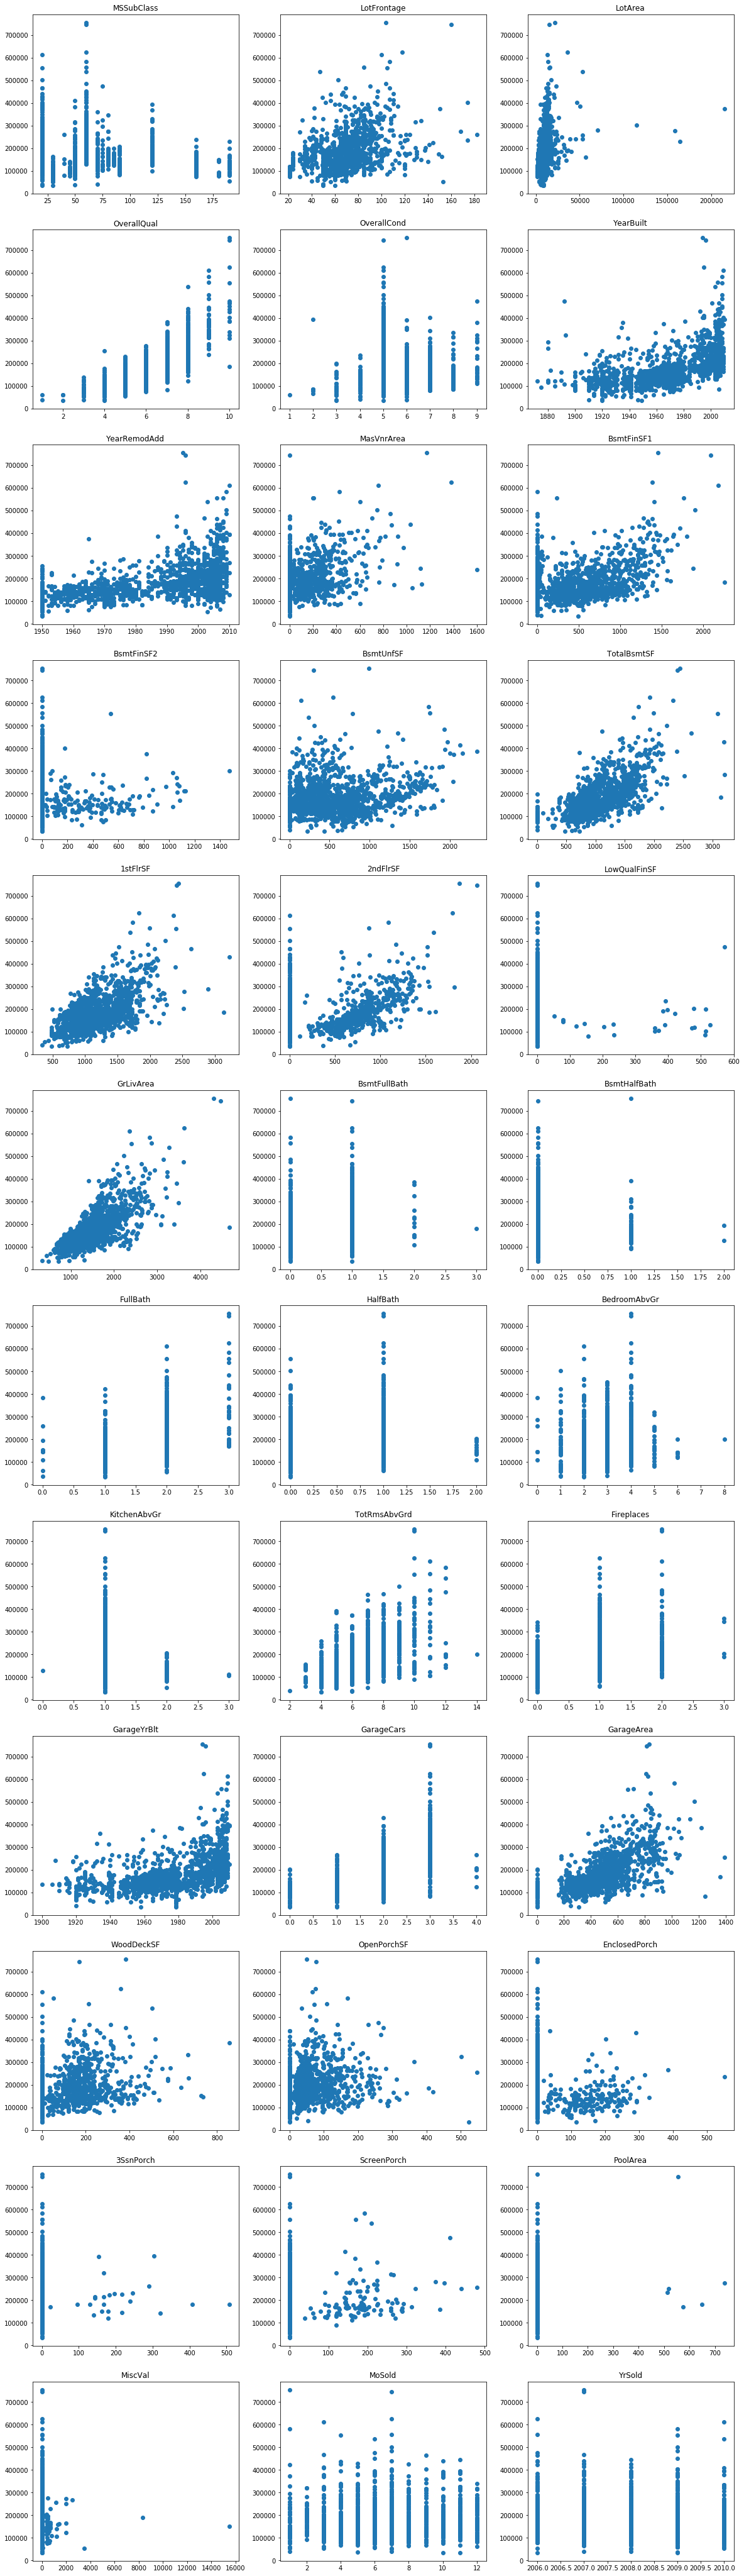

In [12]:
# We look at the scatter plot of other variables
scatterplots = plt.figure(figsize=(20, 30))

for c, index in enumerate(dataset[num_col].columns, 1):
    scatterplots = plt.subplot(12, 3, c)
    plt.scatter(x=dataset[index], y = dataset["SalePrice"])
    plt.title(index)
    plt.subplots_adjust(top = 2)

In [15]:
#Remove some outliers
# Drop observations where LotArea is greater than 100000
dataset.drop(dataset[dataset.LotArea>100000].index, inplace = True)
dataset.reset_index(drop = True, inplace = True)

Now, we can see that not all variables are correlated with the SalePrice and we may not want to included them when we are fitting the data into a machine learning/regression model. Hence, we will take a look at a heatmap that will help us with selecting which variables to use for our model.

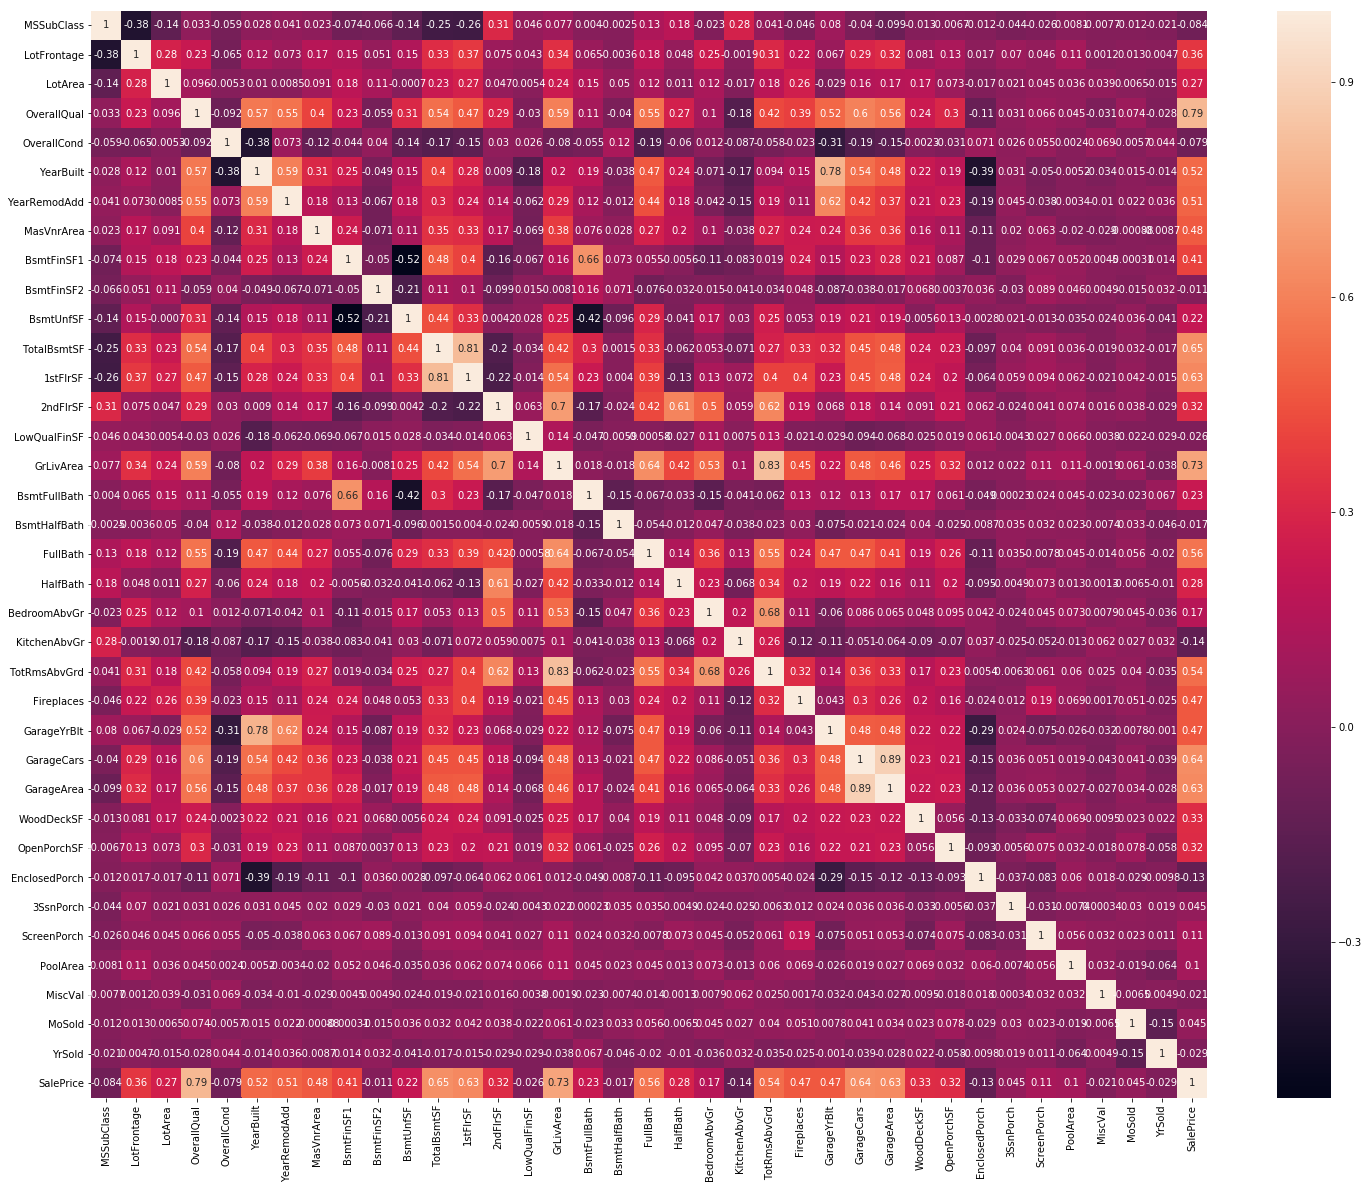

In [13]:
#Add the SalePrice to num_col
num_col.append("SalePrice")

#plot the heatmap
plt.figure(figsize=(25, 20))
sns.heatmap(dataset[num_col].corr(), annot=True)

In [15]:
# We removed uncorrelated variables such as MSSubClass for our model

# Notice YearBuilt and GarageYrBlt are highly correlated with each other so they provide no further information for us
# Therfore, we remove the one with lower correlation with the SalePrice (GarageYrBlt in this case).
# We remove all instances of this with other variables
# Some variables are related to categorical variables such as "MasVnrArea" and "MasVnrType" we remove those for now
corr_var = ['LotFrontage', 'LotArea', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtUnfSF', 
            'TotalBsmtSF', 'GrLivArea', 'Fireplaces', 'GarageCars']

We now divide the dataset into a training set and test set (should've been done at the beginning)

In [16]:
from sklearn.model_selection import train_test_split
X = dataset[corr_var]
y = dataset['SalePrice']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

Now, I am not entirely sure whether I'm doing things correctly and I definitely need to get more dirty. I also need to deal with the categorical variables. 

But I kind of wanted to see what happens if I used this data for training our model.

I decided to use a Random Forest Regressor because it is a tree based model that does not require me to do feature scaling. And I haven't normalized any of my variables.

Again we get help from sklearn to do all the dirty work for us

In [17]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10000, random_state = 0)
regressor.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10000,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

In [18]:
from sklearn.metrics import r2_score
y_pred = regressor.predict(x_test)
r2_score(y_test, y_pred) 

0.90435699880942466

Finally, we on our final steps to predict the house prices that we will submit to kaggle.

We first take a look at the missing values for our final dataset

In [19]:
final_dataset = pd.read_csv("test.csv")
x_final = final_dataset[corr_var]
x_final.isnull().sum()

LotFrontage     227
LotArea           0
OverallQual       0
YearBuilt         0
YearRemodAdd      0
BsmtFinSF1        1
BsmtUnfSF         1
TotalBsmtSF       1
GrLivArea         0
Fireplaces        0
GarageCars        1
dtype: int64

We will impute the missing values with the mean and then get our final house prices

In [21]:
imputer_final = SimpleImputer(missing_values = np.nan, strategy = 'mean')
x_final = imputer_final.fit_transform(x_final)
y_final = regressor.predict(x_final) 

In [22]:
y_final

array([ 125583.002     ,  155456.868     ,  191760.16914667, ...,
        161114.6914    ,  115974.9699    ,  237548.0442    ])

Finally we will export the sale price for submission

In [23]:
df = pd.DataFrame(y_final)
df.columns = ["SalePrice"]
df.index.names = ["Id"]
df.index = df.index + 1461

In [24]:
df.to_csv('submission.csv')

In the end, I ranked around 3000th place out of around 4600 people.
So for next time, I will focus on 